In [1]:
#question 3, classification and regression trees
#input data
base.dat<-read.csv('baseball.csv',header = TRUE)
wea.dat<-read.csv('weather.csv',header = TRUE)
base.dat<-merge(base.dat,wea.dat,by.x = 'event_date',by.y = 'date')
base.dat$event_date<-as.Date(base.dat$event_date)
n<-nrow(base.dat)
base.dat$gametime <- ifelse(as.numeric(substr(base.dat$event_time,1,2))<19,c("Afternoon"),c("Evening"))
base.dat$weekday = weekdays(base.dat$event_date)
baseball<-base.dat
baseball$resale_ratio <- baseball$tickets_resale/baseball$tickets_sold
alert <- ifelse(baseball$resale_ratio <= 0.075, "low",
                ifelse(baseball$resale_ratio<= 0.10, "medium","high"))

In [2]:
#Factorizing character data
baseball$weekday<-as.factor(baseball$weekday)
baseball$gametime<-as.factor(baseball$gametime)

In [3]:
#install package
install.packages(c("rpart","rpart.plot"))
install.packages("randomForest")

Installing packages into ‘/home/lian6/R/x86_64-pc-linux-gnu-library/3.1’
(as ‘lib’ is unspecified)
Installing package into ‘/home/lian6/R/x86_64-pc-linux-gnu-library/3.1’
(as ‘lib’ is unspecified)


In [4]:
#load packages
library(rpart)
library(rpart.plot)

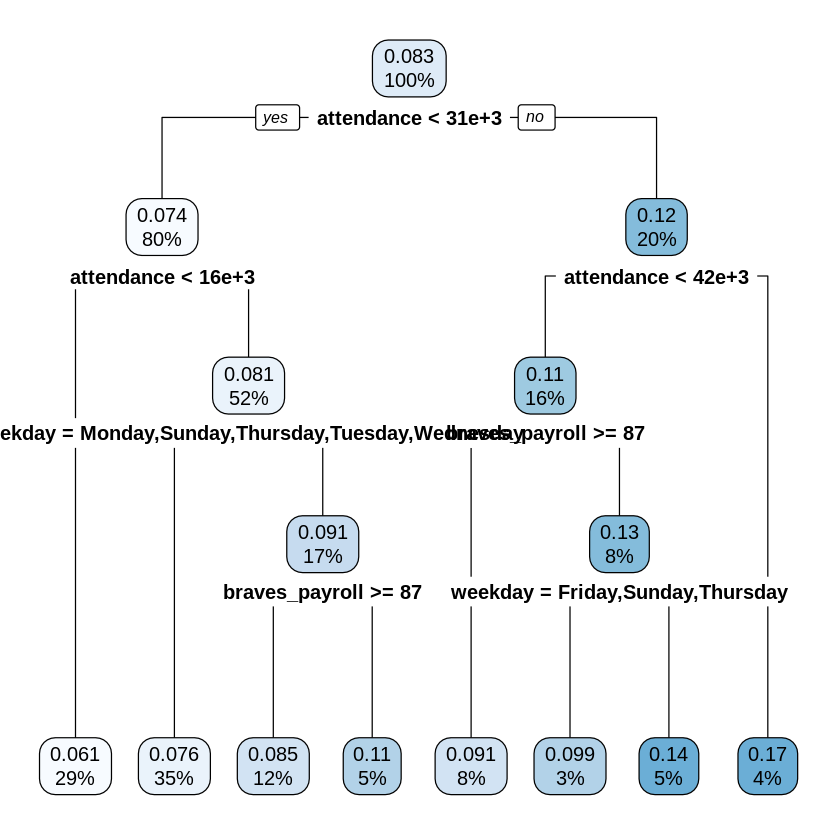

In [5]:
#pruning regresion model
set.seed(123)
modc1 <- rpart(resale_ratio~., data=subset(baseball,select = -c(event_id,event_date,season,tickets_sold,tickets_resale)))
b<-modc1$cptable[which.min(modc1$cptable[,'xerror']),'CP']
modc2<-prune(modc1,cp=b)

#plotting
rpart.plot(modc2,type=2,cex = 1)


In [6]:
#Compare predicted value with actual value
alert_pre<-ifelse(predict(modc2,newdata=subset(baseball,select = -c(event_id,event_date,season,tickets_sold,tickets_resale))) <= 0.075, "low",
                  ifelse(predict(modc2,newdata=baseball)<= 0.10, "medium","high"))
table(alert_pre,alert)


         alert
alert_pre high low medium
   high     51   2      8
   low       2 107     24
   medium   38 100    129

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.


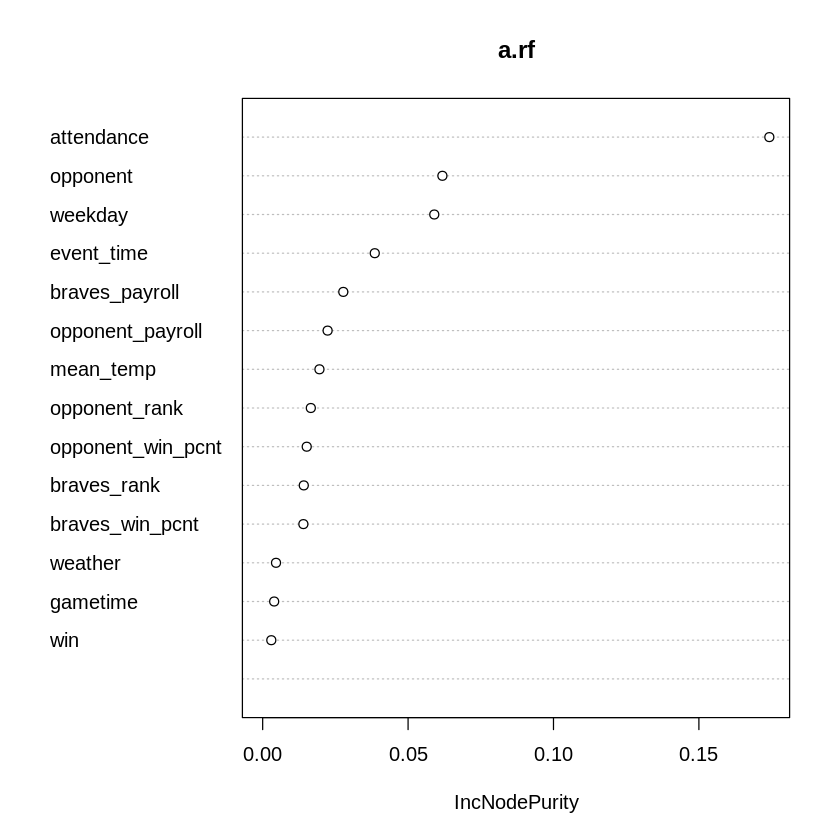

In [7]:
#Bonus: Randomforest
library(randomForest)
#randomforest for regression tre
a.rf <- randomForest(resale_ratio ~ ., data=subset(baseball,select = -c(event_id,event_date,season,tickets_sold,tickets_resale)), ntree=1500) 
#perform way better than pruning regression tree but cannot be easily interpreted since its is a ensemble classifier

varImpPlot(a.rf, n.var=15)
#While tickets_resale greatly effect the resale_ratio, ticket_sold and attendance also to some extent decide the level of resale_ratio, amd other attributes are considered as statisically insignificant


        alert
tree.pre high low medium
  high     63  13     20
  low       4 158     45
  medium   24  38     96

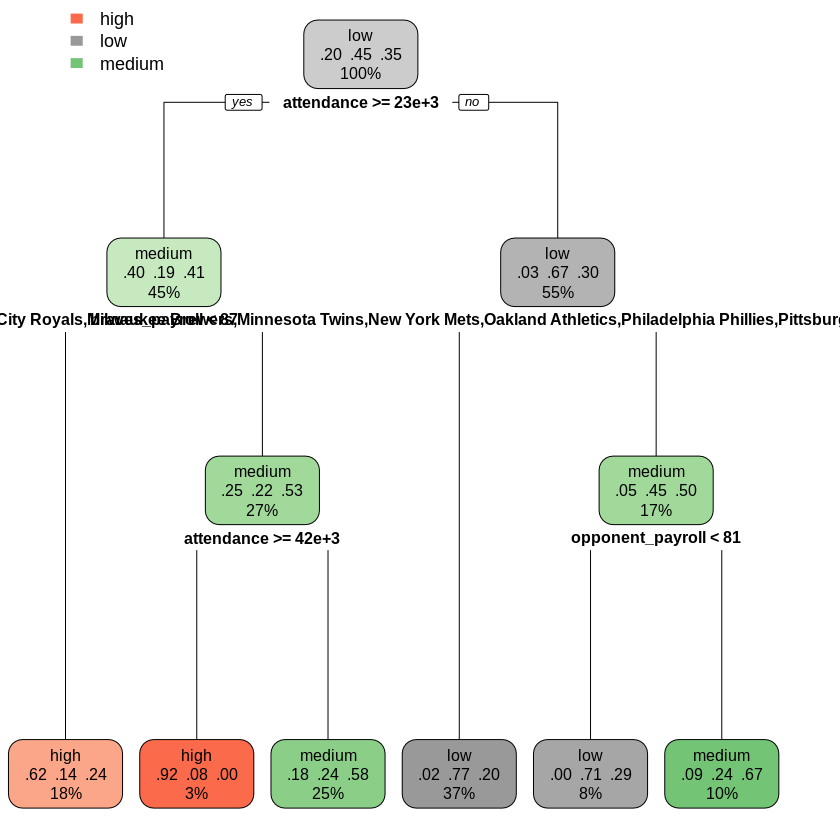

In [8]:
##Classification trees
#trainning model
baseball$alert<-as.factor(alert)
set.seed(12)
cl.a<-rpart(alert~., data=subset(baseball,select = -c(resale_ratio,event_id,event_date,season,tickets_sold,tickets_resale),method = 'class'))
b<-cl.a$cptable[which.min(cl.a$cptable[,'xerror']),'CP']
cl.tree<-prune(cl.a,cp=b)
rpart.plot(cl.tree,type=2,cex = 0.8)
#compare prediction and actual value
tree.pre<-predict(cl.tree,newdata = baseball,type = 'class')
table(tree.pre,alert)

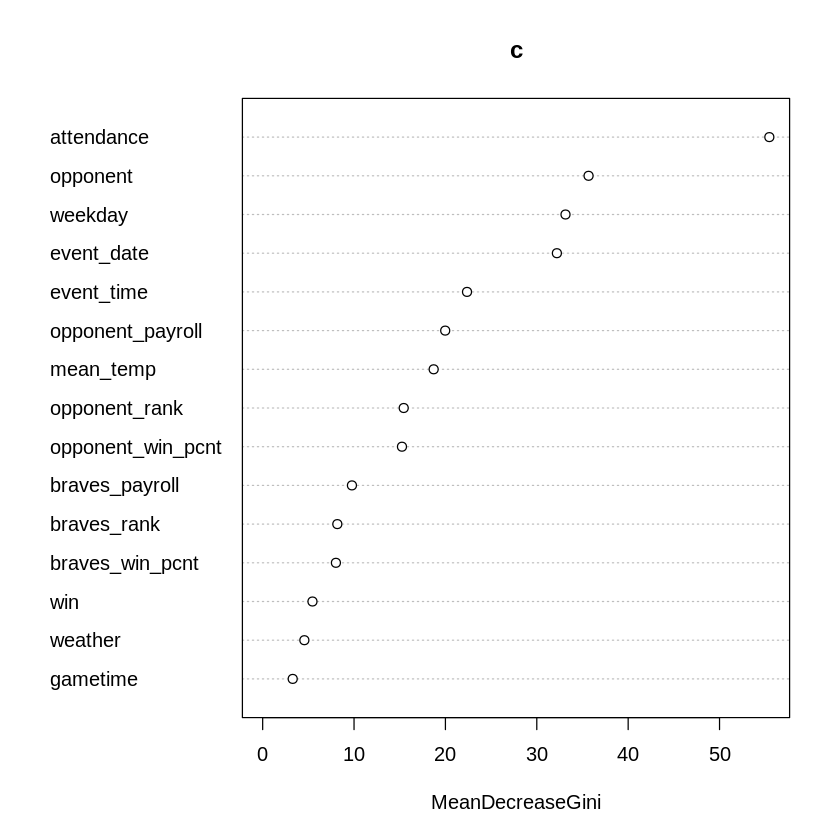

In [9]:
#Randomforest for classification tree
c<-randomForest(alert~.,data=subset(baseball,select = -c(resale_ratio,event_id,season,tickets_sold,tickets_resale),ntree=1500))
varImpPlot(c, n.var=15)